In [1]:
from __future__ import print_function
from matplotlib import pyplot as plt
# get_ipython().magic(u'matplotlib auto')
import tensorflow as tf
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# import torch
from tensorflow import keras

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation
from tensorflow import reshape
from keras.utils import np_utils
from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling1D,AveragePooling1D
from tensorflow.keras.layers import SeparableConv1D, Bidirectional
from tensorflow.keras.layers import ZeroPadding2D,ZeroPadding1D, MaxPooling2D, Bidirectional
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import CSVLogger,LearningRateScheduler
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [3]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import std
# import coremltools
# from torch import nn, optim
# import torch.nn.functional as F
import scipy.io
from scipy import stats
#from IPython.display import display, HTML
from tensorflow.keras import optimizers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import TimeDistributed
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [4]:
def historyVisualization(history):
    # Plot training & validation loss values
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['mean_absolute_error'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['MSE', 'MAE'], loc='upper left')
    plt.show()
def plotPredict(y_pred, y_test):
    plt.title('Predicted vs Actual')
    plt.xlabel('x')
    plt.ylabel('value')
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual ')
    plt.legend()
    plt.show()


In [5]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(20, 14))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [6]:
# mat1=scipy.io.loadcsv('/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/sub_wise_process_TT/S1_tr.csv')
# nina_raw_train=mat1['Training_process_data']
# # # nina_raw_valid=mat1['Valid_raw_data']
# nina_raw_test=mat1['Testing_process_data'] 
# print('raw_Train_data',nina_raw_train)
# # # print('raw_valid_data',nina_raw_valid)
# print('raw_Test_data',nina_raw_test)

In [7]:
# np.savetxt("/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_pro_Train.csv", nina_raw_train, delimiter=",")
# np.savetxt("/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_pro_Test.csv", nina_raw_test, delimiter=",")
# # np.savetxt("/content/drive/My Drive/codes/nina_prep_python/rawdata/nina_pro_Valid.csv", nina_raw_valid, delimiter=",")

In [8]:
# file_path_Train= "/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_pro_Train.csv"
# file_path_Test= "/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_pro_Test.csv"
# file_path_Valid= "/content/drive/My Drive/codes/nina_prep_python/rawdata/nina_pro_Valid.csv"
# file_path_Train= "./nina_pro_Train_E123.csv"
# file_path_Test= "./nina_pro_Test_E123.csv"
# Set some standard parameters upfront
pd.options.display.float_format = '{:.1f}'.format
sns.set() # Default seaborn look and feel
#plt.style.use('ggplot')
print('keras version ', keras.__version__)
# Same labels will be reused throughout the program
LABELS=[]
for i in range(1,53,1):
  LABELS.append (i)
print(LABELS)
# LABELS = ['1','2', '3', '4', '5', '6', '7', '8', '9', '10', '11','12','13',\
# '14','15','16','17','18','19','20','21','22','23','24','25','26','27','28',\
# '29','30','31','32','33','34','35','36','37','38','39','40','41','42','43',\
# '44','45','46','47','48','49','50','51','52']
#LABELS = np.asarray(LABELS)

keras version  2.3.0-tf
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]


In [9]:
# The number of steps within one time segment
TIME_PERIODS = 1
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 1
N_FEATURES = 10

In [10]:
column_names = ['C'+str(j) for j in range(1, N_FEATURES+1)]
lst = ['Class_label']
column_names = column_names+lst
print(column_names)

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'Class_label']


In [11]:
def read_data_Train(file_path_Train):
#     column_names = ['C1', 'C2','C3','C4','C5','C6','C7','C8','C9','C10','Class_label']
    df_Train = pd.read_csv(file_path_Train,
                     header=None,
                     names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Train['Class_label'].replace(regex=True,
      inplace=True,
      to_replace=r';',
      value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Train['Class_label'] = df_Train['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Train.dropna(axis=0, how='any', inplace=True)
    return df_Train
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

In [12]:
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [13]:
def read_data_Test(file_path_Test):
#     column_names = ['C1', 'C2','C3','C4','C5','C6','C7','C8','C9','C10','Class_label']
    df_Test = pd.read_csv(file_path_Test,
                     header=None,
                     names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Test['Class_label'].replace(regex=True,
      inplace=True,
      to_replace=r';',
      value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Test['Class_label'] = df_Test['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Test.dropna(axis=0, how='any', inplace=True)
    return df_Test

In [14]:
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

In [15]:
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [16]:
df_Train = read_data_Train('/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/Total_standard/standard_Train.csv')
# Describe the data
show_basic_dataframe_info(df_Train)
df_Train.head(20)

Number of columns in the dataframe: 11
Number of rows in the dataframe: 4914000



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


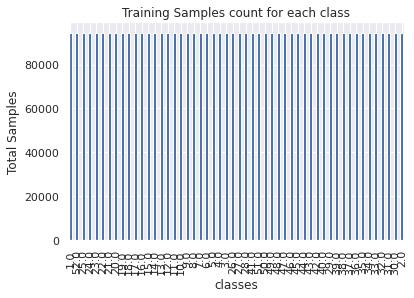

In [17]:
df_Train['Class_label'].value_counts().plot(kind='bar',
                                   title='Training Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
#plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [18]:
df_Test = read_data_Test('/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/Total_standard/standard_Test.csv')
# Describe the data
show_basic_dataframe_info(df_Test)
df_Test.head(20)


Number of columns in the dataframe: 11
Number of rows in the dataframe: 2106000



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


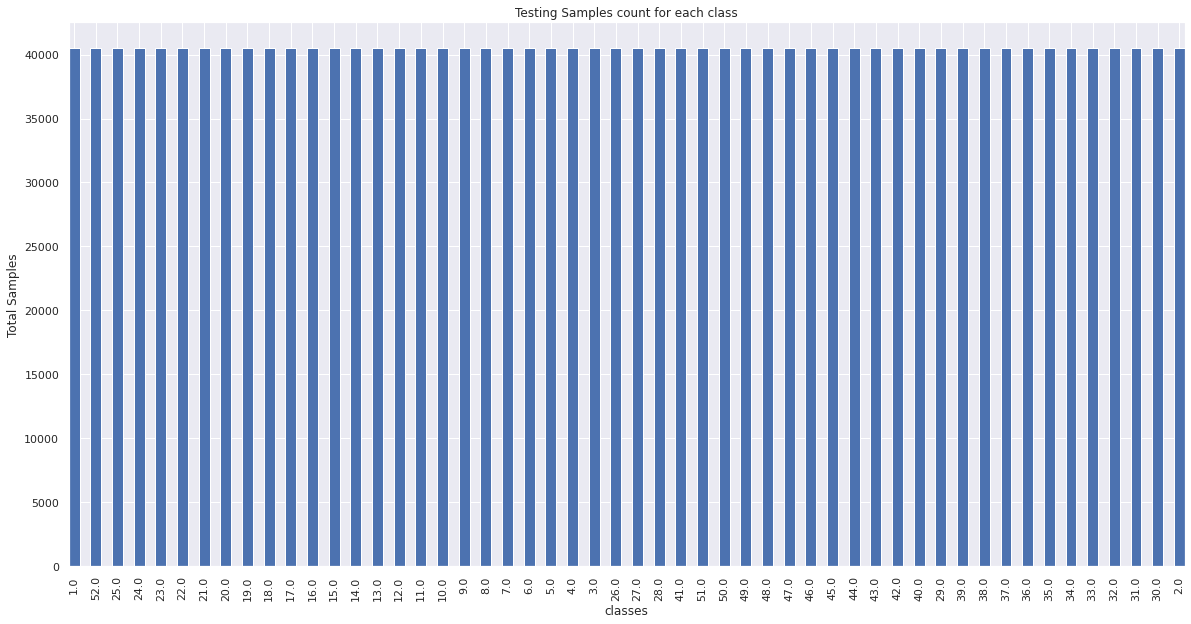

In [19]:
df_Test['Class_label'].value_counts().plot(kind='bar',
                                   title='Testing Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [20]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,0.00678,0.00441,0.01860,0.00589,0.00314,0.00243,0.00194,0.00538,0.00931,0.00376,1.00000
1,0.00703,0.00441,0.01857,0.00589,0.00314,0.00243,0.00195,0.00552,0.00931,0.00376,1.00000
2,0.00728,0.00441,0.01854,0.00589,0.00314,0.00243,0.00196,0.00566,0.00931,0.00376,1.00000
3,0.00750,0.00441,0.01851,0.00589,0.00314,0.00243,0.00197,0.00578,0.00931,0.00376,1.00000
4,0.00770,0.00441,0.01848,0.00589,0.00314,0.00243,0.00198,0.00590,0.00931,0.00376,1.00000


In [21]:
# scaler = preprocessing.StandardScaler().fit(df_Train.iloc[:,0:N_FEATURES])

In [22]:
# df_Train.iloc[:,0:N_FEATURES]=scaler.transform(df_Train.iloc[:,0:N_FEATURES])

In [23]:
# pd.options.display.float_format = "{:,.5f}".format
# df_Train.head(5)

In [24]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,0.01153,0.00574,0.00348,0.00238,0.00138,0.00143,0.00120,0.00801,0.00202,0.00110,1.00000
1,0.01159,0.00574,0.00348,0.00238,0.00138,0.00143,0.00120,0.00802,0.00202,0.00110,1.00000
2,0.01165,0.00574,0.00349,0.00238,0.00138,0.00143,0.00120,0.00803,0.00203,0.00110,1.00000
3,0.01171,0.00574,0.00349,0.00238,0.00138,0.00143,0.00120,0.00803,0.00203,0.00110,1.00000
4,0.01177,0.00575,0.00349,0.00238,0.00138,0.00143,0.00121,0.00802,0.00203,0.00110,1.00000


In [25]:
# df_Test.iloc[:,0:N_FEATURES]=scaler.transform(df_Test.iloc[:,0:N_FEATURES])

In [26]:
# pd.options.display.float_format = "{:,.5f}".format
# df_Test.head(5)

In [27]:
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
df_Train[LABEL] = le.fit_transform(df_Train['Class_label'].values.ravel())
# df_Valid[LABEL] = le.fit_transform(df_Valid['Class_label'].values.ravel())
df_Test[LABEL] = le.fit_transform(df_Test['Class_label'].values.ravel())
print('df_train_size',df_Train)
# print('df_valid_size',df_Valid)
print('df_test_size',df_Test)

df_train_size              C1      C2      C3      C4      C5      C6      C7      C8  \
0       0.00678 0.00441 0.01860 0.00589 0.00314 0.00243 0.00194 0.00538   
1       0.00703 0.00441 0.01857 0.00589 0.00314 0.00243 0.00195 0.00552   
2       0.00728 0.00441 0.01854 0.00589 0.00314 0.00243 0.00196 0.00566   
3       0.00750 0.00441 0.01851 0.00589 0.00314 0.00243 0.00197 0.00578   
4       0.00770 0.00441 0.01848 0.00589 0.00314 0.00243 0.00198 0.00590   
...         ...     ...     ...     ...     ...     ...     ...     ...   
4913995 0.03408 0.01235 0.01901 0.00779 0.00315 0.01766 0.04928 0.06174   
4913996 0.03416 0.01227 0.01898 0.00775 0.00315 0.01756 0.04860 0.06125   
4913997 0.03425 0.01221 0.01897 0.00771 0.00315 0.01748 0.04800 0.06085   
4913998 0.03434 0.01216 0.01895 0.00768 0.00315 0.01742 0.04749 0.06053   
4913999 0.03444 0.01212 0.01894 0.00765 0.00315 0.01737 0.04708 0.06028   

             C9     C10  Class_label  ActivityEncoded  
0       0.00931 0.00376      

In [28]:
# 15 function to segment data into trial lengths (trial length =513 samples in this dataset)
def create_segments_and_labels(df, time_steps,step,n_features, label_name):
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
      for j in range(1, n_features+1):
        L = ('C'+str(j)) 
        segments.append(df[str(L)].values[i: i + time_steps])
      label = stats.mode(df[label_name][i: i + time_steps])[0][0]
      labels.append(label)
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, n_features)
    labels = np.asarray(labels)
    return reshaped_segments, labels

In [29]:
x_train, y_train = create_segments_and_labels(df_Train,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_train shape: ', x_train.shape)
# print(x_train)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)
# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
print(num_time_periods)
print(num_sensors)
num_classes = le.classes_.size
print(list(le.classes_))
# input_shape = (num_time_periods,num_sensors)
# print(input_shape)
input_shape = (num_time_periods,num_sensors)
#x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train[0].shape)
print('input_shape:', input_shape)
x_train = x_train.astype('float32')
# x_train = [torch.tensor(arr, dtype=torch.float32) for arr in x_train]
# y_train = y_train.astype('float32')
# print(y_train)
y_train_hot = np_utils.to_categorical(y_train, num_classes)
print(y_train_hot)
# y_train_hot= [torch.tensor(arr, dtype=torch.uint8) for arr in y_train_hot]
print('New y_train shape: ', y_train_hot.shape)

x_train shape:  (4913999, 1, 10)
4913999 training samples
y_train shape:  (4913999,)
1
10
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0]
x_train shape: (1, 10)
input_shape: (1, 10)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
New y_train shape:  (4913999, 52)


In [30]:
x_test, y_test = create_segments_and_labels(df_Test,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_test shape: ', x_test.shape)
# print(x_train)
print(x_test.shape[0], 'testing samples')
print('y_test shape: ', y_test.shape)
# Set input_shape / reshape for Keras
#x_test = x_test.reshape(x_test.shape[0], input_shape)
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')
y_test_hot = np_utils.to_categorical(y_test, num_classes)

x_test shape:  (2105999, 1, 10)
2105999 testing samples
y_test shape:  (2105999,)


In [31]:
# n_steps, n_length = 20, 25
# n_steps, n_length= 10, 50
# n_steps, n_length= 16, 32
n_steps, n_length = 1, 10
n_depth=1
x_train = x_train.reshape(x_train.shape[0], n_steps, n_length,n_depth)
print('x_train shape: ', x_train.shape)
# x_valid = x_valid.reshape(x_valid.shape[0], n_steps, n_length, n_depth)
# print('x_valid shape: ', x_valid.shape)
x_test = x_test.reshape(x_test.shape[0], n_steps, n_length,n_depth)
print('x_test shape: ', x_test.shape)
n_outputs = y_train_hot.shape[1]
print('n_outputs',n_outputs)

x_train shape:  (4913999, 1, 10, 1)
x_test shape:  (2105999, 1, 10, 1)
n_outputs 52


In [32]:
verbose, epochs, batch_size = 0, 500, 1000

In [33]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', kernel_initializer="he_normal",strides=(1,1), \
                           input_shape=(n_steps,n_length,n_depth)))
model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Conv2D(filters=64, kernel_size=(3,3),padding="same",kernel_initializer="he_normal",strides=(1,1)))
model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Conv2D(64, kernel_size=(1, 1),kernel_initializer="he_normal",strides=(1,1)))
model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Conv2D(64, kernel_size=(1, 1),kernel_initializer="he_normal",strides=(1,1)))
model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
# model.add(Dense(512, activation='tanh'))
model.add(Dense(n_outputs, activation='softmax'))

In [34]:
def step_decay(epoch):
   initial_lrate = 0.1
   drop = 0.1
   epochs_drop = 16.0
   lrate = initial_lrate * tf.math.pow(drop,  
           tf.math.floor((1+epoch)/epochs_drop))
   return lrate

In [35]:
lrate = tf.keras.callbacks.LearningRateScheduler(step_decay)

In [36]:
# adam=optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
sgd=optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=False, name='SGD')
checkpoint_filepath = '/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/Total_standard/CNN1X10/checkpoint.hdf5'
# model.load_weights(checkpoint_filepath) 
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,verbose=1, monitor='val_accuracy',save_weights_only=True,save_best_only=True)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1, 10, 64)         640       
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 10, 64)         256       
_________________________________________________________________
activation (Activation)      (None, 1, 10, 64)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 10, 64)         36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 10, 64)         256       
_________________________________________________________________
activation_1 (Activation)    (None, 1, 10, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 10, 64)         4

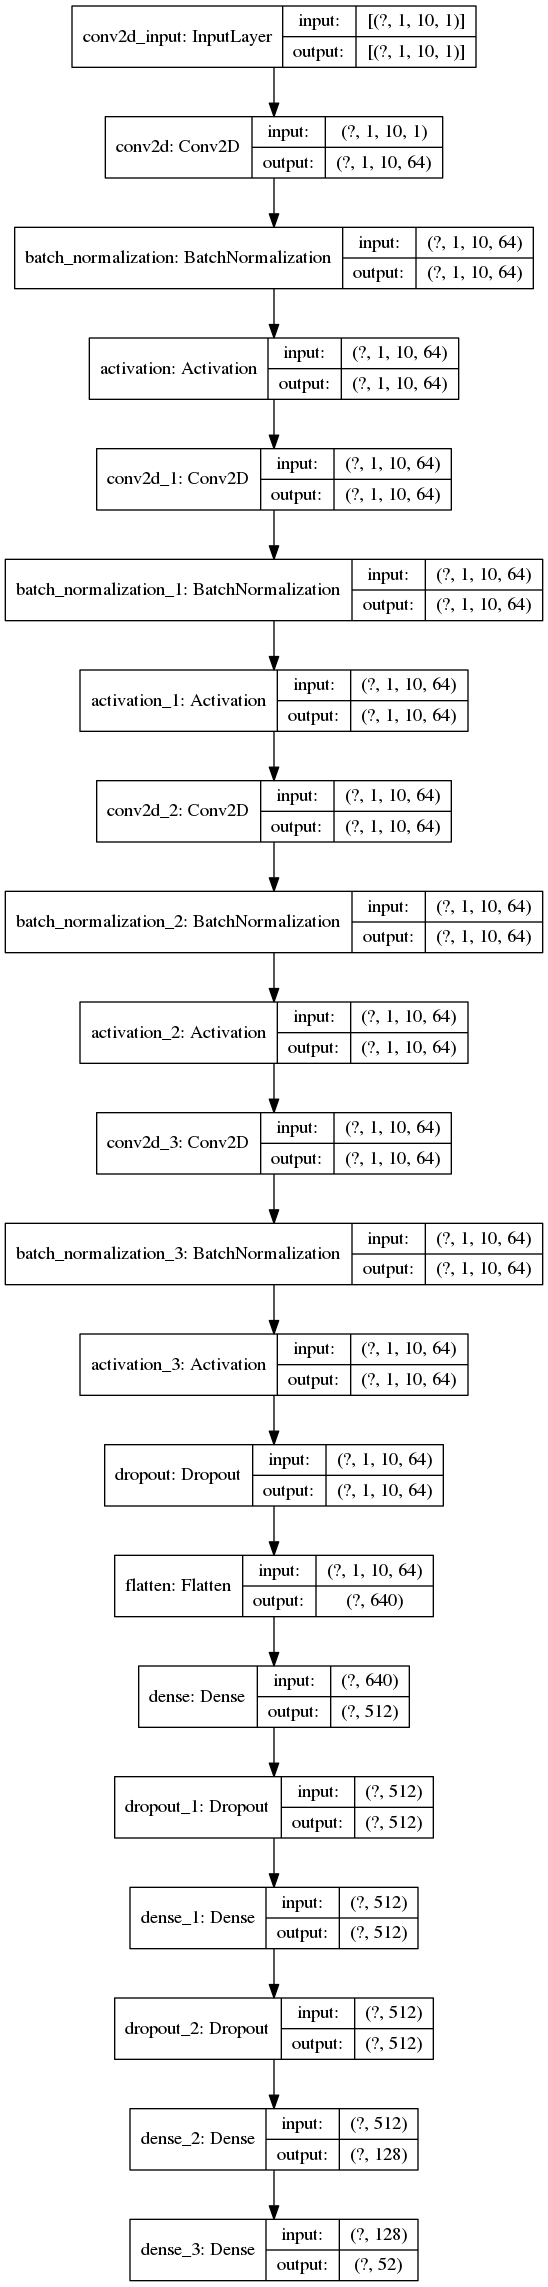

In [37]:
tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/Total_standard/CNN1X10/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)

In [38]:
csv_logger = CSVLogger('/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/Total_standard/CNN1X10/LSTM_nina_20X100.csv', append=True, separator=';')
history = model.fit(x_train, y_train_hot, epochs=epochs, batch_size=batch_size, callbacks=[csv_logger,checkpoint_callback,lrate,early],validation_data=(x_test, y_test_hot), verbose=1)

Epoch 1/500
4914/4914 [==============================] - ETA: 0s - loss: 3.0938 - accuracy: 0.1847
Epoch 00001: val_accuracy improved from -inf to 0.27377, saving model to /media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/Total_standard/CNN1X10/checkpoint.hdf5
4914/4914 [==============================] - 85s 17ms/step - loss: 3.0938 - accuracy: 0.1847 - val_loss: 2.8244 - val_accuracy: 0.2738 - lr: 0.1000
Epoch 2/500
4912/4914 [============================>.] - ETA: 0s - loss: 2.7081 - accuracy: 0.2695
Epoch 00002: val_accuracy improved from 0.27377 to 0.31462, saving model to /media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/Total_standard/CNN1X10/checkpoint.hdf5
4914/4914 [==============================] - 54s 11ms/step - loss: 2.7081 - accuracy: 0.2695 - val_loss: 2.6427 - val_accuracy: 0.3146 - lr: 0.1000
Epoch 3/500
4914/4914 [==============================] - ETA: 0s - loss: 2.5883 - accuracy: 0.2983
Epoch 00003: val_accuracy improved from 0.3146

Epoch 26/500
4908/4914 [============================>.] - ETA: 0s - loss: 2.2224 - accuracy: 0.3869
Epoch 00026: val_accuracy did not improve from 0.34484
4914/4914 [==============================] - 47s 10ms/step - loss: 2.2224 - accuracy: 0.3869 - val_loss: 2.7489 - val_accuracy: 0.3399 - lr: 0.0100
Epoch 27/500
4910/4914 [============================>.] - ETA: 0s - loss: 2.2196 - accuracy: 0.3874
Epoch 00027: val_accuracy did not improve from 0.34484
4914/4914 [==============================] - 47s 10ms/step - loss: 2.2196 - accuracy: 0.3874 - val_loss: 2.7299 - val_accuracy: 0.3422 - lr: 0.0100
Epoch 28/500
4914/4914 [==============================] - ETA: 0s - loss: 2.2175 - accuracy: 0.3881
Epoch 00028: val_accuracy did not improve from 0.34484
4914/4914 [==============================] - 47s 10ms/step - loss: 2.2175 - accuracy: 0.3881 - val_loss: 2.7230 - val_accuracy: 0.3433 - lr: 0.0100
Epoch 29/500
4911/4914 [============================>.] - ETA: 0s - loss: 2.2159 - accuracy

Epoch 53/500
4911/4914 [============================>.] - ETA: 0s - loss: 2.1989 - accuracy: 0.3923
Epoch 00053: val_accuracy did not improve from 0.34484
4914/4914 [==============================] - 47s 9ms/step - loss: 2.1988 - accuracy: 0.3923 - val_loss: 2.7318 - val_accuracy: 0.3429 - lr: 1.0000e-04
Epoch 54/500
4913/4914 [============================>.] - ETA: 0s - loss: 2.1984 - accuracy: 0.3926
Epoch 00054: val_accuracy did not improve from 0.34484
4914/4914 [==============================] - 47s 10ms/step - loss: 2.1984 - accuracy: 0.3926 - val_loss: 2.7490 - val_accuracy: 0.3425 - lr: 1.0000e-04
Epoch 55/500
4908/4914 [============================>.] - ETA: 0s - loss: 2.1982 - accuracy: 0.3926
Epoch 00055: val_accuracy did not improve from 0.34484
4914/4914 [==============================] - 47s 10ms/step - loss: 2.1982 - accuracy: 0.3926 - val_loss: 2.7165 - val_accuracy: 0.3441 - lr: 1.0000e-04
Epoch 56/500
4914/4914 [==============================] - ETA: 0s - loss: 2.1973

Epoch 80/500
4914/4914 [==============================] - ETA: 0s - loss: 2.1975 - accuracy: 0.3928
Epoch 00080: val_accuracy did not improve from 0.34484
4914/4914 [==============================] - 47s 10ms/step - loss: 2.1975 - accuracy: 0.3928 - val_loss: 2.7236 - val_accuracy: 0.3445 - lr: 1.0000e-06
Epoch 81/500
4910/4914 [============================>.] - ETA: 0s - loss: 2.1977 - accuracy: 0.3930
Epoch 00081: val_accuracy did not improve from 0.34484
4914/4914 [==============================] - 47s 9ms/step - loss: 2.1977 - accuracy: 0.3930 - val_loss: 2.7441 - val_accuracy: 0.3427 - lr: 1.0000e-06
Epoch 82/500
4911/4914 [============================>.] - ETA: 0s - loss: 2.1978 - accuracy: 0.3926
Epoch 00082: val_accuracy did not improve from 0.34484
4914/4914 [==============================] - 47s 10ms/step - loss: 2.1978 - accuracy: 0.3926 - val_loss: 2.7556 - val_accuracy: 0.3417 - lr: 1.0000e-06
Epoch 83/500
4911/4914 [============================>.] - ETA: 0s - loss: 2.1977

Epoch 107/500
4909/4914 [============================>.] - ETA: 0s - loss: 2.1977 - accuracy: 0.3928
Epoch 00107: val_accuracy did not improve from 0.34484
4914/4914 [==============================] - 46s 9ms/step - loss: 2.1977 - accuracy: 0.3928 - val_loss: 2.7704 - val_accuracy: 0.3408 - lr: 1.0000e-07
Epoch 108/500
4908/4914 [============================>.] - ETA: 0s - loss: 2.1981 - accuracy: 0.3926
Epoch 00108: val_accuracy did not improve from 0.34484
4914/4914 [==============================] - 47s 9ms/step - loss: 2.1981 - accuracy: 0.3926 - val_loss: 2.7494 - val_accuracy: 0.3423 - lr: 1.0000e-07
Epoch 109/500
4911/4914 [============================>.] - ETA: 0s - loss: 2.1984 - accuracy: 0.3927
Epoch 00109: val_accuracy did not improve from 0.34484
4914/4914 [==============================] - 47s 10ms/step - loss: 2.1984 - accuracy: 0.3927 - val_loss: 2.7453 - val_accuracy: 0.3425 - lr: 1.0000e-07
Epoch 110/500
4910/4914 [============================>.] - ETA: 0s - loss: 2.1

In [39]:
best_index = history.history['val_accuracy'].index(max(history.history['val_accuracy']))
print('epoch_number',best_index+1)
print('train accuracy and validation accuracy', history.history['accuracy'][best_index], history.history['val_accuracy'][best_index])

epoch_number 12
train accuracy and validation accuracy 0.3489813506603241 0.3448368310928345


In [40]:
model.save('/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/Total_standard/CNN1X10/CNN_LSTM_nina_5X97')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/Total_standard/CNN1X10/CNN_LSTM_nina_5X97/assets


history loss
history accuracy
history val_loss
history val_accuracy
history lr


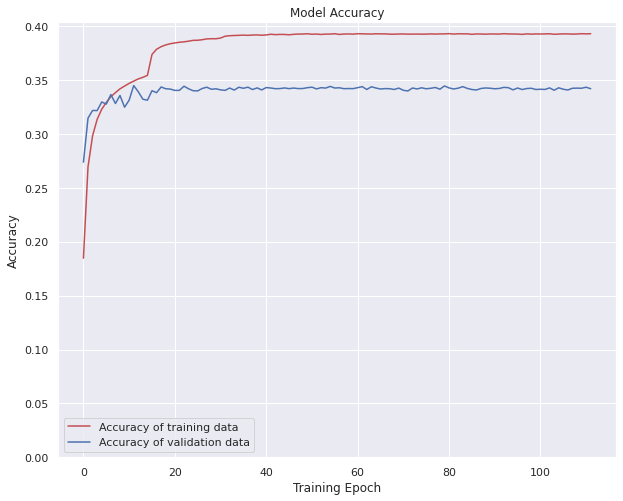

In [41]:
for i in history.history:
    print("history",i)
plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

history loss
history accuracy
history val_loss
history val_accuracy
history lr


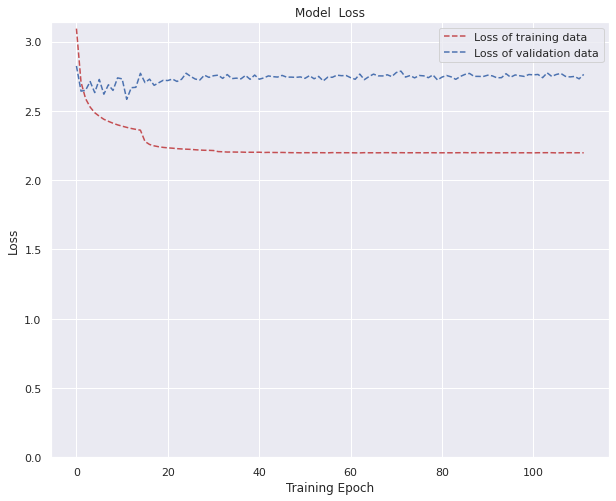

In [42]:
for i in history.history:
    print("history",i)
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [43]:
model.load_weights(checkpoint_filepath) 
_, testaccuracy = model.evaluate(x_test, y_test_hot, batch_size=batch_size, verbose=1)
print('test_accuracy',testaccuracy)

2106/2106 [==============================] - 12s 6ms/step - loss: 2.5837 - accuracy: 0.3448
test_accuracy 0.3448368310928345


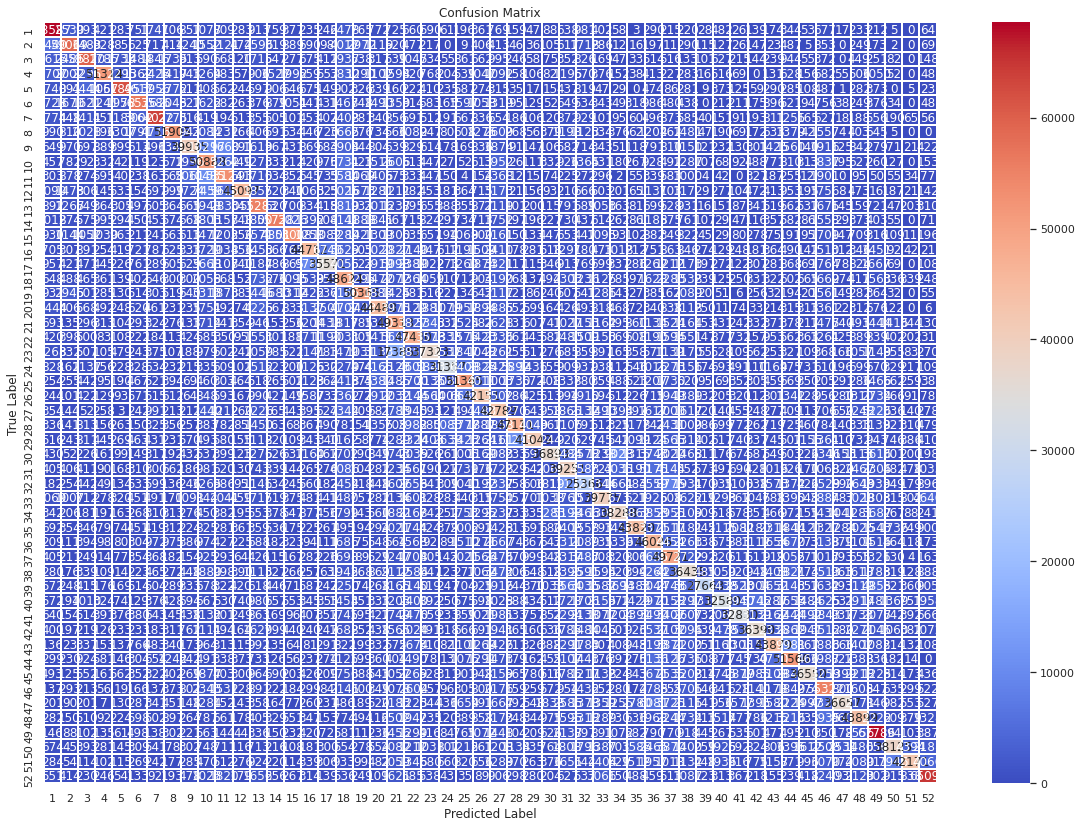

              precision    recall  f1-score   support

           0       0.62      0.73      0.67     94500
           1       0.66      0.63      0.64     94500
           2       0.63      0.63      0.63     94500
           3       0.74      0.54      0.63     94500
           4       0.78      0.65      0.71     94500
           5       0.65      0.60      0.63     94500
           6       0.63      0.68      0.65     94500
           7       0.63      0.55      0.59     94500
           8       0.57      0.42      0.48     94500
           9       0.37      0.54      0.44     94500
          10       0.48      0.56      0.52     94500
          11       0.76      0.48      0.59     94500
          12       0.46      0.59      0.51     94500
          13       0.66      0.59      0.62     94500
          14       0.69      0.56      0.62     94500
          15       0.50      0.47      0.48     94500
          16       0.53      0.38      0.44     94500
          17       0.28    

In [44]:
y_pred_train = model.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
#max_y_train = np.argmax(y_train, axis=1)
show_confusion_matrix(y_train, max_y_pred_train)
print(classification_report(y_train, max_y_pred_train))

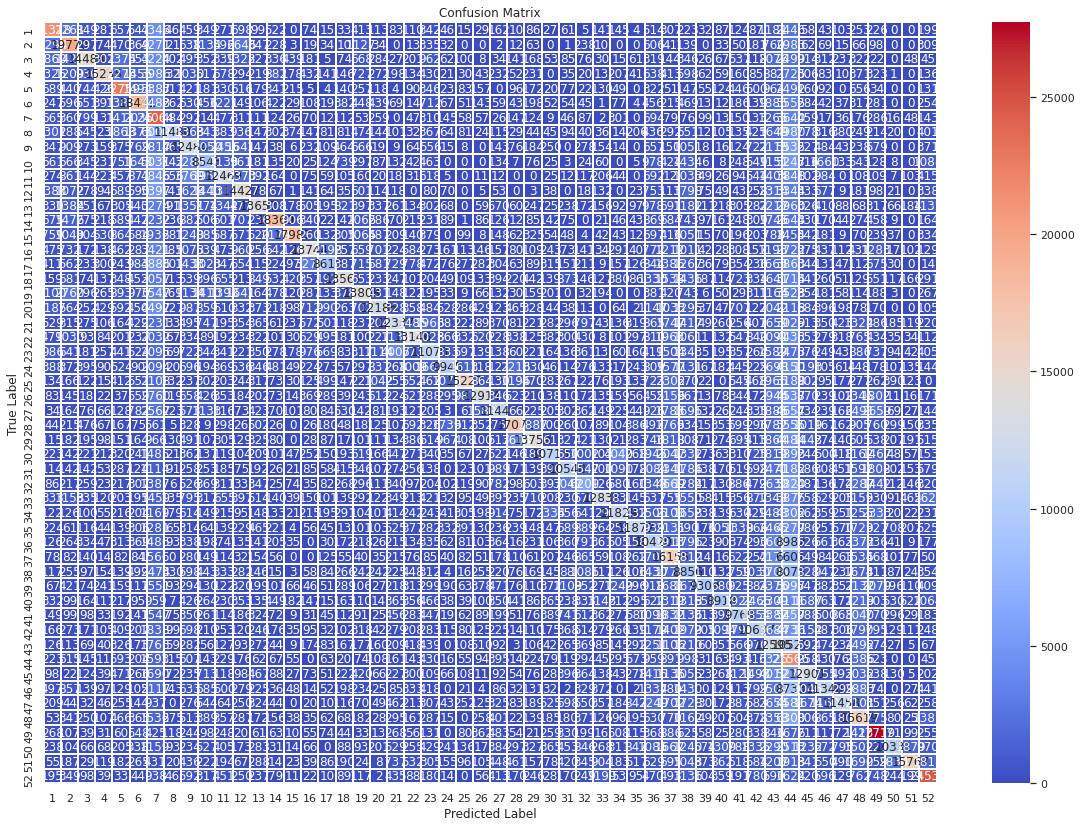

              precision    recall  f1-score   support

           0       0.48      0.53      0.50     40500
           1       0.41      0.49      0.44     40500
           2       0.53      0.36      0.43     40500
           3       0.68      0.38      0.48     40500
           4       0.48      0.56      0.52     40500
           5       0.42      0.46      0.44     40500
           6       0.16      0.59      0.25     40500
           7       0.59      0.28      0.38     40500
           8       0.25      0.31      0.28     40500
           9       0.25      0.21      0.23     40500
          10       0.35      0.31      0.33     40500
          11       0.38      0.36      0.37     40500
          12       0.50      0.34      0.40     40500
          13       0.61      0.45      0.52     40500
          14       0.79      0.44      0.57     40500
          15       0.54      0.34      0.42     40500
          16       0.49      0.21      0.30     40500
          17       0.58    

In [45]:
y_pred_test = model.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_hot, axis=1)
show_confusion_matrix(max_y_test, max_y_pred_test)

print(classification_report(max_y_test, max_y_pred_test))